In [1]:
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys, pathlib
import xarray
import xbout
import scipy
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *
from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

from code_comparison.code_comparison import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2


print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [2]:
db = CaseDB(
    case_dir = os.path.join(onedrive_path, r"Project\collab\tech\cases"),
    grid_dir = os.path.join(onedrive_path, r"Project\collab\tech\grid")
)

toload = [
    dict(name="tn30", id="d8a-tn_30ev", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
]

casestore = dict()

for case in toload:
    casestore[case["name"]] = Load.case_2D(db.casepaths[case["id"]], gridfilepath = db.gridpaths[case["grid"]],double_load = False, keep_boundaries = True)

--> g11, g_22, dx, dy and J will not be unnormalised
CHECK: Total domain volume is 4.381E+07 [m3]


In [3]:
soledgecases = {
    "nocurr_base" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\nocurrents_baseline"), # Original case with hydrogen
    "nocore_d" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\copy_wallStd_bra_nocore_D"), # No ionising core BC, deuterium
    "tightwall" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\copy_wallMike_bra_nocore_D"),
}
solpscases = {
    "base" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5"),
    "noiz_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"),
    "gammai_2.5" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00"),
    "dpuff_1e22" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22"),
    "dpuff_5e21" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=5.0E+21"),
    "no_fast_reflec" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"),
    "nsep_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.nesepm=3E+19"),
}


In [4]:
plt.close("all")
%matplotlib widget

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


b2fgmtry loaded from .pkl


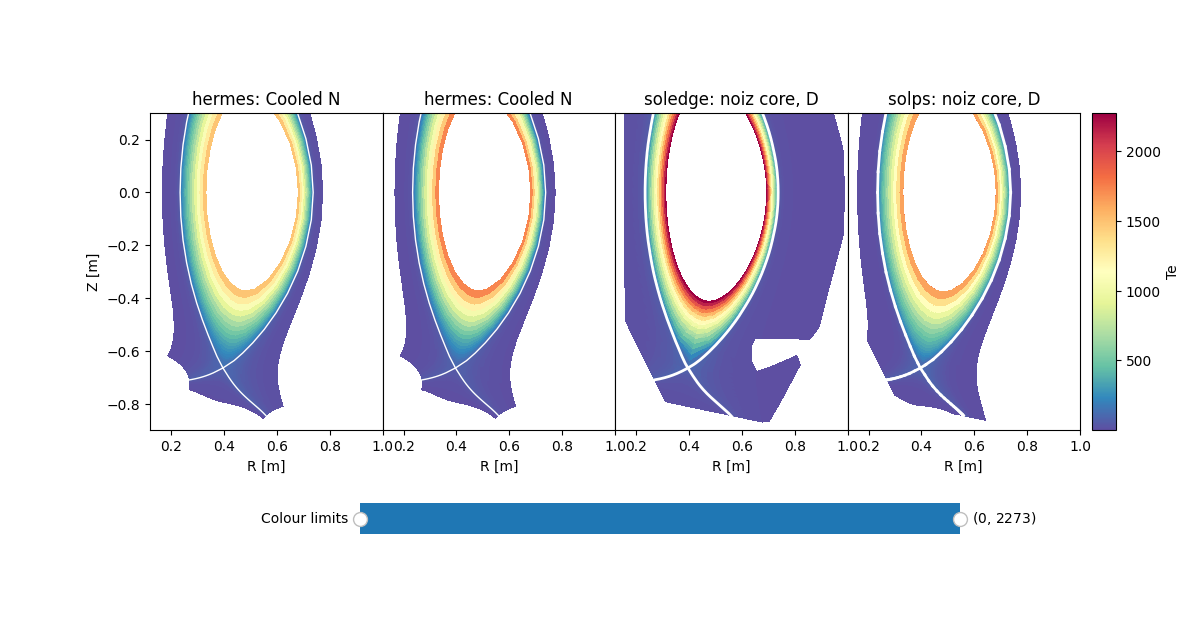

In [25]:
self = v = viewer_2d(
    "Te",
    cases = [
        {"name" : "Cooled N", "code":"hermes", "ds" : casestore["tn30"].ds.isel(t=0)},
        {"name" : "Cooled N", "code":"hermes", "ds" : casestore["tn30"].ds.isel(t=-1)},
        {"name" : "noiz core, D", "code":"soledge", "path" : soledgecases["nocore_d"]},
        {"name" : "noiz core, D", "code":"solps", "path" : solpscases["noiz_core"]},
    ],
    logscale = False,
    # vmin = 10,
    # vmax = 2000,
    # vmin = 1e17,
    # vmax = 5e17,
    dpi = 100,
    ylim = (-0.9,0.3),
    xlim = (0.12, 1.0),
    wspace = 0.0,
    cmap = "Spectral_r"
)

In [8]:
param = "Te"
cases = [
    {"name" : "Cooled N", "code":"hermes", "ds" : casestore["tn30"].ds.isel(t=0)},
    {"name" : "Cooled N", "code":"hermes", "ds" : casestore["tn30"].ds.isel(t=-1)},
    {"name" : "noiz core, D", "code":"soledge", "path" : soledgecases["nocore_d"]},
    {"name" : "noiz core, D", "code":"solps", "path" : solpscases["noiz_core"]},]
logscale = False
vmin = None
vmax = None
dpi = 100
ylim = (-0.9,0.3)
xlim = (0.12, 1.0)
wspace = 0.0
cmap = "Spectral_r"

plots = []
for case in cases:
    if case["code"] == "hermes":
        plots.append(HermesPlot(case["ds"], param = param))
    
    elif case["code"] == "solps":
        plots.append(SOLPSplot(case["path"], param = param))
        
    elif case["code"] == "soledge":
        plots.append(SOLEDGEplot(case["path"], param = param))
self.cases = cases
self.plots = plots
num_cases = len(cases)


# Find ranges if not provided
vlims = {"min":[], "max":[]}
Rlims = {"min":[], "max":[]}
Zlims = {"min":[], "max":[]}

for plot in plots:
    vlims["min"].append(plot.vmin)
    vlims["max"].append(plot.vmax)
    Rlims["min"].append(plot.Rlim[0]); Rlims["max"].append(plot.Rlim[1])
    Zlims["min"].append(plot.Zlim[0]); Zlims["max"].append(plot.Zlim[1])
    

# Get color limits
self.min = min(vlims["min"]) if vmin == None else vmin
self.max = max(vlims["max"]) if vmax == None else vmax
norm = create_norm(logscale, None, self.min, self.max)

# Get plot size
Rmin = min(Rlims["min"]); Rmax = max(Rlims["max"])
Zmin = min(Zlims["min"]); Zmax = max(Zlims["max"])
box_width = Rmax - Rmin
box_height = Zmax - Zmin
box_aspect_ratio = box_height / box_width



c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


b2fgmtry loaded from .pkl


In [31]:
%matplotlib widget

In [ ]:
plt.close("all")

ylim = (-0.9,0)
xlim = (0.12, 1.0)

fig = plt.figure(dpi=dpi)
scale = 3
fig.set_figwidth(1 * scale * num_cases)
fig.set_figheight(1 * scale * box_aspect_ratio)

# Plot grid
gs0a = mpl.gridspec.GridSpec(
                                ncols=num_cases, nrows=2,
                                width_ratios = [1]*num_cases , #+ [0.2] + [0.1], # cbar, empty space, control,
                                height_ratios = [0.90, 0.1],
                                wspace = wspace
                                )

# outerax = fig.add_subplot(gs0a[0])
# outerax.tick_params(axis='both',which='both',bottom=0,left=0,
#                     labelbottom=0, labelleft=0)
# outerax.set_facecolor("red")
# outerax.patch.set_alpha(0.3)

axes = [None]*(num_cases)

for i, plot in enumerate(plots):
    
    # All plots after the first one share x and y axes
    if i == 0:
        axes[i] = fig.add_subplot(gs0a[i])
    else:
        axes[i] = fig.add_subplot(gs0a[i], sharex=axes[0], sharey=axes[0])
    
    case = cases[i]
    plot.plot(ax = axes[i], norm = norm, cmap = cmap, separatrix = True)
    axes[i].set_title(f"{case['code']}: {case['name']}")
    
    # SET LIMITS------------------------------------
    if xlim != (None, None):
        axes[i].set_xlim(xlim)
    else:
        axes[i].set_xlim(0.15, 0.78)
        
    if ylim != (None, None):
        axes[i].set_ylim(ylim)
    else:
        axes[i].set_ylim(-0.88,0.1)
    
    # Take out Y markings from plots after first one
    if i != 0:
        axes[i].set_ylabel("")
        axes[i].set_xlabel("R [m]")
        axes[i].tick_params(axis="y", which="both", left=False,labelleft=False)
        
# Add colorbar
  
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cax = fig.add_axes([axes[-1].get_position().x1+0.01,axes[-1].get_position().y0,0.02,axes[-1].get_position().height])
plt.colorbar(mappable = sm, cax=cax, label = param) # Similar to fig.colorbar(im, cax = cax)


slider = RangeSlider(
    fig.add_axes([0.2, 0.05, 0.5, 0.1]), "Colour limits",   # left, bottom, width, height
    self.min, self.max,
    orientation = "horizontal",
    valinit = (self.min, self.max)
    )
    

artists = []

# This is to account for missing artists if one case has no param
for i in range(num_cases):
    try:
        artists.append(axes[i].collections[0])
    except:
        pass
# artists = artists.append(cbar)

def update(val):
    slider.ax.set_ylim(self.min, self.max) # This is inexplicably needed otherwise it freezes
    
    cbar.norm.vmin = val[0]
    cbar.norm.vmax = val[1]
        
    for i, artist in enumerate(artists):
        if logscale == True:
            artist.norm.vmin = np.log10(val[0])
            artist.norm.vmax = np.log10(val[1])
        else:
            artist.norm.vmin = val[0]
            artist.norm.vmax = val[1]
        
        fig.canvas.draw_idle()
        fig.canvas.flush_events() # https://stackoverflow.com/questions/64789437/what-is-the-difference-between-figure-show-figure-canvas-draw-and-figure-canva
        
slider.on_changed(update)

NameError: name 'dpi' is not defined

In [46]:
len(axes)

7

In [45]:
type(axes[4])

NoneType